#**Prediction of Completed Vaccination in Indonesia By Using Linear Regression and Polynomial Regression - After 50% of Target Reached**#

#INTRODUCTION#

This is a simple machine learning project in order to predict when the COVID-19 vaccination will be completed as it reaches the target amount. As we know that we can see from https://vaksin.kemkes.go.id/#/vaccines that contains real-time vaccination information in Indonesia, and attached 208,265,720 as the target amount. Indonesian's population in 2019 was about 270,600,000. Based on 2019 data, the target is about 76.96% from total of 2019 Indonesian's population. 
This tells us that at least more than 3/4 of Indonesian's population have to be vaccinated so that will leads the government to take new policies and decisions.

We obtain the daily data from the previously mentioned link that contains the number reached everyday in percentage (%).

In this project, we will published the prediction in 3 time segments: predictions after the vaccination is reached until 25%, 50%, and 75%. 

(*THIS SEGMENT IS THE UPDATED DATA AFTER WE REACH THE SECOND QUARTER OF DOSE 1 TARGET*)


Before we start, please make sure we are in the same frame that we will set January 13th 2021 as day-1 in this data. This date was set since the first Vaccine Dose 1 was recieved by President of Indonesia, Mr. Joko Widodo.

We will use and also compare which one best from the list of:
1. Linear Regression,
2. Polynomial Regression to the power of 2, and
3. Polynomial Regression to the power of 3.

##Importing The Library##

We will import some libraries that will be used later

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import statistics as stat
import scipy
from scipy import stats
import datetime
import math
from IPython.display import display, Math, Latex

##Add The Data

By adding the date, we will use datetime library to convert 'the date' data into data of 'order of the day'. So we can convert the date into the number of the day after January 13th 2021.

In this Dose 1 cell, we will add the date (as 'vac1' list) and the vaccination percentage at that time (as 'am_vac1' list).
Here is the table that contains:
1. days after January 13th 2021,
2. date, and
3. vaccination percentage at that time.

In [31]:
#DOSE 1

import datetime as dt

vac1, am_vac1 = [dt.date(2021, 3, 10), dt.date(2021, 3, 11), dt.date(2021, 3, 31), dt.date(2021, 4, 30), dt.date(2021, 5, 30),
      dt.date(2021, 6, 14), dt.date(2021, 6, 23), dt.date(2021, 6, 29), dt.date(2021, 7, 1), dt.date(2021, 7, 12),
      dt.date(2021, 7, 15), dt.date(2021, 7, 16), dt.date(2021, 7, 17), dt.date(2021, 7, 18), dt.date(2021, 7, 19),
      dt.date(2021, 7, 21), dt.date(2021, 7, 22), dt.date(2021, 7, 24), dt.date(2021, 7, 25), dt.date(2021, 7, 26),
      dt.date(2021, 7, 27), dt.date(2021, 7, 28), dt.date(2021, 7, 29), dt.date(2021, 7, 30), dt.date(2021, 7, 31),
      dt.date(2021, 8, 1), dt.date(2021, 8, 3), dt.date(2021, 8, 4), dt.date(2021, 8, 5), dt.date(2021, 8, 6), dt.date(2021, 8, 7),
      dt.date(2021, 8, 8), dt.date(2021, 8, 12), dt.date(2021, 8, 13), dt.date(2021, 8, 15), dt.date(2021, 8, 17),
      dt.date(2021, 8, 19), dt.date(2021, 8, 20), dt.date(2021, 8, 22), dt.date(2021, 8, 23), dt.date(2021, 8, 24),
      dt.date(2021, 8, 27), dt.date(2021, 9, 9), dt.date(2021, 9, 11), dt.date(2021, 9, 12), dt.date(2021, 9, 13),
      dt.date(2021, 9, 16), dt.date(2021, 9, 18), dt.date(2021, 9, 20), dt.date(2021, 9, 21), dt.date(2021, 9, 22),
      dt.date(2021, 9, 23), dt.date(2021, 9, 28), dt.date(2021, 9, 29), dt.date(2021, 10, 2), dt.date(2021, 10, 3),
      dt.date(2021, 10, 4), dt.date(2021, 10, 6), dt.date(2021, 10, 7), dt.date(2021, 10, 8), dt.date(2021, 10, 9),
      dt.date(2021, 10, 10), dt.date(2021, 10, 11), dt.date(2021, 10, 12), dt.date(2021, 10, 13), dt.date(2021, 10, 14)
      ],  [   2,    2.02,     4,     6,     8, 
             10,      12,    14,    16,  18.6,
          19.03,   19.64, 19.82, 20.06, 20.32, 
          20.58,   20.72, 21.29, 21.39, 21.61, 
          21.86,   22.11, 22.36, 22.57, 22.68,
          22.90, 23.10, 23.29, 23.46, 23.79, 23.99,
           24.25, 25.08, 25.26, 25.92, 26.46, 27.04,
           27.22, 27.53, 27.86, 28.51, 29.19, 34.02, 34.87,
           34.99, 35.45, 36.77, 37.96, 38.25, 38.93,
           39.72, 40.39, 42.83, 43.39, 44.69, 45.09, 45.24, 46.15,
           46.52, 47.24, 47.93, 48.04, 48.44, 48.82, 49.55, 50.08]

#Convert the date into the number of days counted from January 13th 2021.
from datetime import date
d0 = date(2021, 1, 13) #13 Januari 2021
hari1 = []
for i in range(0,len(vac1)):
  delta = vac1[i] - d0
  hari1.append(delta.days)

#Show the table
pd.concat([pd.DataFrame(hari1), pd.DataFrame(vac1), pd.DataFrame(am_vac1)], axis=1).set_axis(['days after January 13th 2021','date', '%'], axis=1)

,days after January 13th 2021,date,%
0,56,2021-03-10,2.00
1,57,2021-03-11,2.02
2,77,2021-03-31,4.00
3,107,2021-04-30,6.00
4,137,2021-05-30,8.00
...,...,...,...
61,270,2021-10-10,48.04
62,271,2021-10-11,48.44
63,272,2021-10-12,48.82
64,273,2021-10-13,49.55


Just like Dose 1, in this Dose 2 cell we will add the date (as 'vac2' list) and the vaccination percentage for dose 2 at that time (as 'am_vac2' list).
Here is the table that contains:
1. days after January 13th 2021,
2. date, and
3. vaccination percentage (for dose 2) at that time.

In [32]:
#DOSE 2

import datetime as dt

tr_vac3, tr_am_vac3 = [dt.date(2021, 4, 1), dt.date(2021, 5, 6), dt.date(2021, 6, 21), dt.date(2021, 7, 16), dt.date(2021, 7, 17),
      dt.date(2021, 7, 18), dt.date(2021, 7, 19), dt.date(2021, 7, 21), dt.date(2021, 7, 22), dt.date(2021, 7, 24),
      dt.date(2021, 7, 25), dt.date(2021, 7, 26), dt.date(2021, 7, 27), dt.date(2021, 7, 28), dt.date(2021, 7, 29),
      dt.date(2021, 7, 30), dt.date(2021, 7, 31), dt.date(2021, 8, 1), dt.date(2021, 8, 3), dt.date(2021, 8, 4),
      dt.date(2021, 8, 5), dt.date(2021, 8, 6), dt.date(2021, 8, 7), dt.date(2021, 8, 8), dt.date(2021, 8, 12), dt.date(2021, 8, 13),
      dt.date(2021, 8, 15), dt.date(2021, 8, 17), dt.date(2021, 8, 19), dt.date(2021, 8, 20), dt.date(2021, 8, 22),
      dt.date(2021, 8, 23), dt.date(2021, 8, 24), dt.date(2021, 8, 27), dt.date(2021, 9, 9), dt.date(2021, 9, 11),
      dt.date(2021, 9, 12), dt.date(2021, 9, 13), dt.date(2021, 9, 16), dt.date(2021, 9, 18), dt.date(2021, 9, 20),
      dt.date(2021, 9, 21), dt.date(2021, 9, 22), dt.date(2021, 9, 23), dt.date(2021, 9, 28), dt.date(2021, 9, 29),
      dt.date(2021, 10, 2), dt.date(2021, 10, 3), dt.date(2021, 10, 4), dt.date(2021, 10, 6), dt.date(2021, 10, 7),
      dt.date(2021, 10, 8), dt.date(2021, 10, 9), dt.date(2021, 10, 10), dt.date(2021, 10, 11), dt.date(2021, 10, 12),
      dt.date(2021, 10, 13), dt.date(2021, 10, 14)

      ],[   2,    4,    6, 7.73, 7.79, 
           7.82,  7.9, 8.03, 8.11, 8.55, 
           8.61, 8.82, 9.05, 9.29, 9.54,
           9.75, 9.86, 10.05, 10.29, 10.55, 10.70,
         11.08, 11.30, 11.42, 12.31, 12.69, 13.55,
         14.02, 14.69, 14.86, 15.17, 15.48, 16.01,
         16.53, 19.5, 19.99, 20.06, 20.32, 21.00, 21.58,
         21.72, 22.15, 22.46, 22.73, 24.02, 24.34, 25.12, 25.30,
         25.45, 26.28, 26.49, 27.02, 27.48, 27.57, 27.84, 28.20,
         28.66, 29.01
         ]

er = []
for i in range (0, len(vac1)):
  er.append(datetime.timedelta(days=30) + vac1[i])

vac2, am_vac2 = er, am_vac1

from datetime import date
d0 = date(2021, 1, 13) #13 Januari 2021
hari2 = []
for i in range(0,len(vac2)):
  delto = vac2[i] - d0
  hari2.append(delto.days)

hari3 = []
for i in range(0,len(tr_am_vac3)):
  delto = tr_vac3[i] - d0
  hari3.append(delto.days)

pd.concat([pd.DataFrame(hari2), pd.DataFrame(vac2), pd.DataFrame(am_vac2)], axis=1).set_axis(['days after January 13th 2021','date', '%'], axis=1)

,days after January 13th 2021,date,%
0,86,2021-04-09,2.00
1,87,2021-04-10,2.02
2,107,2021-04-30,4.00
3,137,2021-05-30,6.00
4,167,2021-06-29,8.00
...,...,...,...
61,300,2021-11-09,48.04
62,301,2021-11-10,48.44
63,302,2021-11-11,48.82
64,303,2021-11-12,49.55


##TRAINING THE DATA##

Based on the title of the project, we will use Linear Regression, Polynomial Regression to the power of 2, and Polynomial Regression to the power of 3.

After we Convert the date data, we will train the data by using 3 types of regression. We set the number of day as independent variabels, and the the vaccination percentage as dependent variables.

In [33]:
X = np.array(hari1).reshape(-1, 1)
y = np.array(am_vac1)

M = np.array(hari2).reshape(-1, 1)
n = np.array(am_vac2)

V = np.array(hari3).reshape(-1, 1)
w = np.array(tr_am_vac3)

In [34]:
from sklearn.linear_model import LinearRegression
#For Dose 1
lin_reg = LinearRegression()
lin_reg.fit(X, y)

#For Dose 2
lin_regre = LinearRegression()
lin_regre.fit(M, n)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)

#For Dose 1
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

poly_reg3 = PolynomialFeatures(degree = 3)
X_poly3 = poly_reg3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3, y)

#For Dose 2
X_polynom = poly_reg.fit_transform(M)
lin_regre_2 = LinearRegression()
lin_regre_2.fit(X_polynom, n)

X_polynom3 = poly_reg3.fit_transform(M)
lin_regre_3 = LinearRegression()
lin_regre_3.fit(X_polynom3, n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Before we continue, we have to understand the logic here. From the procedure, we know that someone can be vaccinated for second dose after 30 days since someone was vaccinated for first dose.

So, we won't use the **kemenkes dashboard** for dose 2, we will use form of **day of dose 2 = day of dose 1 + 30 days** instead. But we're still using the kemenkes dahsboard data for dose 2 to evaluate the form **day of dose 2 = day of dose 1 + 30 days**.

In [35]:
#Alternative

#For Dose 2 Alternative
Alt_lin_regre = LinearRegression()
Alt_lin_regre.fit(V, w)

Alt_X_polynom = poly_reg.fit_transform(V)
Alt_lin_regre_2 = LinearRegression()
Alt_lin_regre_2.fit(Alt_X_polynom, w)

Alt_X_polynom3 = poly_reg3.fit_transform(V)
Alt_lin_regre_3 = LinearRegression()
Alt_lin_regre_3.fit(Alt_X_polynom3, w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##PREDICTION

After the three of regressors have been train, we will see the prediction for each dose 1 and dose 2 in visual.

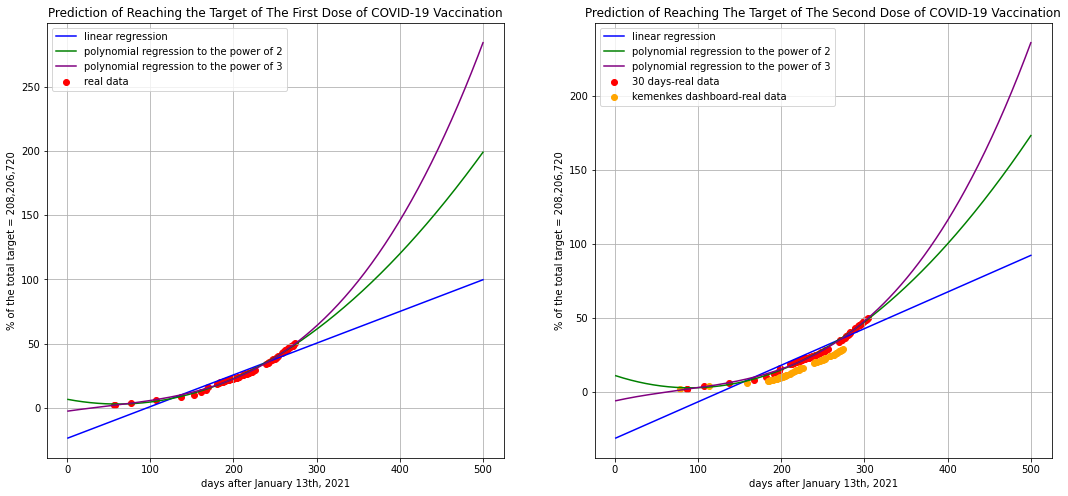

In [36]:
#Visual
k = np.linspace(1,500,500)
k = np.array(k).reshape(-1, 1)

fig = plt.figure(figsize=(18,8))

fig.add_subplot(1,2,1)
plt.scatter(X, y, c = 'red', label = 'real data')
plt.plot(k, lin_reg.predict(k), c = 'blue', label = 'linear regression')
plt.plot(k, lin_reg_2.predict(poly_reg.fit_transform(k)), c='green', label = 'polynomial regression to the power of 2')
plt.plot(k, lin_reg_3.predict(poly_reg3.fit_transform(k)), c='purple', label = 'polynomial regression to the power of 3')
plt.title('Prediction of Reaching the Target of The First Dose of COVID-19 Vaccination')
plt.ylabel('% of the total target = 208,206,720')
plt.xlabel('days after January 13th, 2021')
plt.legend()
plt.grid()

fig.add_subplot(1,2,2)
plt.scatter(M, n, c = 'red', label = '30 days-real data')
plt.scatter(V, w, c = 'orange', label = 'kemenkes dashboard-real data')
plt.plot(k, lin_regre.predict(k), c = 'blue', label = 'linear regression')
plt.plot(k, lin_regre_2.predict(poly_reg.fit_transform(k)), c='green', label = 'polynomial regression to the power of 2')
plt.plot(k, lin_regre_3.predict(poly_reg3.fit_transform(k)), c='purple', label = 'polynomial regression to the power of 3')

plt.title('Prediction of Reaching The Target of The Second Dose of COVID-19 Vaccination')
plt.ylabel('% of the total target = 208,206,720')
plt.xlabel('days after January 13th, 2021')
plt.legend()
plt.grid()

Visually, we can see that purple curve (Polynomial Regression to the power of 3 model, with the purple curve) is the fastest model which reach 100% line. But, we still have to find out some parameters that will help us to decide which model will be recommended.

##**EVALUATE THE REGRESSORS**

After we get the kemenkes dashboard data, we will evaluate the regressors (linear regressor, polynomial regressor to the power of 2, and polynomial regressor to the power 3) by compare the prediction data and the kemenkes dashboard data. Closer r-square score of a regressor to one (1), will be more recommended the regressor will be used.

###Evaluate Each Regressor

In [37]:
#r2_score
raw_reg1_1 = []
raw_reg1_2 = []
raw_reg1_3 = []

hari1_new = np.array(hari1).reshape(-1,1)
for i in range(0,len(hari1_new)): 
  raw_reg1_1.append(lin_reg.predict(hari1_new[[i]]))
  raw_reg1_2.append(lin_reg_2.predict(poly_reg.fit_transform(hari1_new[[i]])))
  raw_reg1_3.append(lin_reg_3.predict(poly_reg3.fit_transform(hari1_new[[i]])))

raw_reg2_1 = []
raw_reg2_2 = []
raw_reg2_3 = []
 
hari2_new = np.array(hari2).reshape(-1,1)
for i in range(0,len(hari2_new)):
  raw_reg2_1.append(lin_regre.predict(hari2_new[[i]]))
  raw_reg2_2.append(lin_regre_2.predict(poly_reg.fit_transform(hari2_new[[i]])))
  raw_reg2_3.append(lin_regre_3.predict(poly_reg3.fit_transform(hari2_new[[i]]))) 

raw_reg3_1 = []
raw_reg3_2 = []
raw_reg3_3 = []
 
hari3_new = np.array(hari3).reshape(-1,1)
for i in range(0,len(hari3_new)):
  raw_reg3_1.append(Alt_lin_regre.predict(hari3_new[[i]]))
  raw_reg3_2.append(Alt_lin_regre_2.predict(poly_reg.fit_transform(hari3_new[[i]])))
  raw_reg3_3.append(Alt_lin_regre_3.predict(poly_reg3.fit_transform(hari3_new[[i]]))) 


from sklearn.metrics import r2_score
print('for First Dose Vaccine,', '\n',
      'r2 score for linear regression =', r2_score(raw_reg1_1, am_vac1),'\n',
      'r2 score for polynomial regression to the power of 2 =', r2_score(raw_reg1_2, am_vac1), '\n',
      'r2 score for polynomial regression to the power of 3 =', r2_score(raw_reg1_3, am_vac1))

print('for Second Dose Vaccine,', '\n',
      'r2 score for linear regression =', r2_score(raw_reg2_1, am_vac2),'\n',
      'r2 score for polynomial regression to the power of 2 =', r2_score(raw_reg2_2, am_vac2), '\n',
      'r2 score for polynomial regression to the power of 3 =', r2_score(raw_reg2_3, am_vac2))

print('for Second Dose Vaccine Dashboard Real-Data,', '\n',
      'r2 score for linear regression =', r2_score(raw_reg3_1, tr_am_vac3),'\n',
      'r2 score for polynomial regression to the power of 2 =', r2_score(raw_reg3_2, tr_am_vac3), '\n',
      'r2 score for polynomial regression to the power of 3 =', r2_score(raw_reg3_3, tr_am_vac3))

for First Dose Vaccine, 
 r2 score for linear regression = 0.8971976383470568 
 r2 score for polynomial regression to the power of 2 = 0.995228391446012 
 r2 score for polynomial regression to the power of 3 = 0.996458483046486
for Second Dose Vaccine, 
 r2 score for linear regression = 0.8971976383470567 
 r2 score for polynomial regression to the power of 2 = 0.9952283914460117 
 r2 score for polynomial regression to the power of 3 = 0.9964584830464377
for Second Dose Vaccine Dashboard Real-Data, 
 r2 score for linear regression = 0.8678787170025289 
 r2 score for polynomial regression to the power of 2 = 0.9954531085482431 
 r2 score for polynomial regression to the power of 3 = 0.9954538526248794


In [38]:
#The Predictions from each Regression Model
reg1_1 = []
reg1_2 = []
reg1_3 = []

import datetime 
for i in range(0,len(k)): 
  reg1_1.append(lin_reg.predict(k[[i]]))
  reg1_2.append(lin_reg_2.predict(poly_reg.fit_transform(k[[i]])))
  reg1_3.append(lin_reg_3.predict(poly_reg3.fit_transform(k[[i]])))

reg2_1 = []
reg2_2 = []
reg2_3 = []

import datetime 
for i in range(0,len(k)):
  reg2_1.append(lin_regre.predict(k[[i]]))
  reg2_2.append(lin_regre_2.predict(poly_reg.fit_transform(k[[i]])))
  reg2_3.append(lin_regre_3.predict(poly_reg3.fit_transform(k[[i]]))) 

#Dashboard Real-Data
reg3_1 = []
reg3_2 = []
reg3_3 = []

import datetime 
for i in range(0,len(k)):
  reg3_1.append(Alt_lin_regre.predict(k[[i]]))
  reg3_2.append(Alt_lin_regre_2.predict(poly_reg.fit_transform(k[[i]])))
  reg3_3.append(Alt_lin_regre_3.predict(poly_reg3.fit_transform(k[[i]]))) 

###Choosing Which Regression Model That Will Be Used

In [39]:
#Choose the regreesion model based on the best r2_score and the moving trend

p1 = lin_reg.predict(k)
p2 = lin_reg_2.predict(poly_reg.fit_transform(k))
p3 = lin_reg_3.predict(poly_reg3.fit_transform(k))

q1 = lin_regre.predict(k)
q2 = lin_regre_2.predict(poly_reg.fit_transform(k))
q3 = lin_regre_3.predict(poly_reg3.fit_transform(k))

o1 = Alt_lin_regre.predict(k)
o2 = Alt_lin_regre_2.predict(poly_reg.fit_transform(k))
o3 = Alt_lin_regre_3.predict(poly_reg3.fit_transform(k)) 

#dose 1
if p1[0] < p1[len(p1) - 1]:
  if r2_score(raw_reg1_1,am_vac1) > r2_score(raw_reg1_2,am_vac1):
    if r2_score(raw_reg1_1,am_vac1) > r2_score(raw_reg1_3,am_vac1):
      reg_best1 = reg1_1
      print('We will use the \'linear regression model\' for the data of first dose')
    else:
      if p3[0] < p3[len(p3) - 1]:
        reg_best1 = reg1_3
        print('We will use \'polynomial regression to the power of 3\' for the data of first dose')
      else:
        reg_best1 = reg1_1
        print('We will use the \'linear regression model\' for the data of first dose')
  else:
    if p2[0] < p2[len(p2) - 1]:
      if r2_score(raw_reg1_2,am_vac1) > r2_score(raw_reg1_3,am_vac1):
        reg_best1 = reg1_2
        print('We will use \'polynomial regression to the power of 2\' for the data of first dose')
      else:
        if p3[0] < p3[len(p3) - 1]:
          reg_best1 = reg1_3
          print('We will use \'polynomial regression to the power of 3\' for the data of first dose')
        else:
          reg_best1 = reg1_2
          print('We will use \'polynomial regression to the power of 2\' for the data of first dose')

#dose 2
if q1[0] < q1[len(q1) - 1]:
  if r2_score(raw_reg2_1,am_vac2) > r2_score(raw_reg2_2,am_vac2):
    if r2_score(raw_reg2_1,am_vac2) > r2_score(raw_reg2_3,am_vac2):
      reg_best2 = reg2_1
      print('We will use the \'linear regression model\' for the data of second dose')
    else:
      if q3[0] < q3[len(q3) - 1]:
        reg_best2 = reg2_3
        print('We will use \'polynomial regression to the power of 3\' for the data of second dose')
      else:
        reg_best2 = reg2_1
        print('We will use the \'linear regression model\' for the data of second dose')
  else:
    if q2[0] < q2[len(q2) - 1]:
      if r2_score(raw_reg2_2,am_vac2) > r2_score(raw_reg2_3,am_vac2):
        reg_best2 = reg2_2
        print('We will use \'polynomial regression to the power of 2\' for the data of second dose')
      else:
        if q3[0] < q3[len(q3) - 1]:
          reg_best2 = reg2_3
          print('We will use \'polynomial regression to the power of 3\' for the data of second dose')
        else:
          reg_best2 = reg2_2
          print('We will use \'polynomial regression to the power of 2\' for the data of second dose')

#alternative of dose 2
if o1[0] < o1[len(o1) - 1]:
  if r2_score(raw_reg3_1,tr_am_vac3) > r2_score(raw_reg3_2,tr_am_vac3):
    if r2_score(raw_reg3_1,tr_am_vac3) > r2_score(raw_reg3_3,tr_am_vac3):
      reg_best3 = reg3_1
    else:
      if o3[0] < o3[len(o3) - 1]:
        reg_best3 = reg3_3
      else:
        reg_best3 = reg3_1
        
  else:
    if o2[0] < o2[len(o2) - 1]:
      if r2_score(raw_reg3_2,tr_am_vac3) > r2_score(raw_reg3_3,tr_am_vac3):
        reg_best3 = reg3_2
      else:
        if o3[0] < o3[len(o3) - 1]:
          reg_best3 = reg3_3
        else:
          reg_best3 = reg3_2

We will use 'polynomial regression to the power of 3' for the data of first dose
We will use 'polynomial regression to the power of 3' for the data of second dose


##Prediction for all k

Since we have set the number of the 'k', in this case we set k-days after January 13th 2021 will be predicted, so here are the tables for dose1 and dose 2. Then we will select the days from 'k' that produce the number of % that close to 100%.

In [40]:
#DOSE 1
import datetime 
gh = []
datev1 = []
for i in range(0, len(k)):
  gh.append(datetime.timedelta(days = i))
  datev1.append(datetime.date(2021, 1, 13) + gh[i])

table2 = pd.concat([pd.DataFrame(k), pd.DataFrame(datev1), pd.DataFrame(reg_best1)], axis=1).set_axis(['days after January 13th 2021','date','%'], axis=1)  
table2

,days after January 13th 2021,date,%
0,1.0,2021-01-13,-2.649887
1,2.0,2021-01-14,-2.556444
2,3.0,2021-01-15,-2.463727
3,4.0,2021-01-16,-2.371718
4,5.0,2021-01-17,-2.280402
...,...,...,...
495,496.0,2022-05-23,277.519953
496,497.0,2022-05-24,279.217361
497,498.0,2022-05-25,280.921991
498,499.0,2022-05-26,282.633858


In [41]:
#DOSE 2
import datetime 
ger = []
datev2 = []
for i in range(0, len(k)):
  ger.append(datetime.timedelta(days = i))
  datev2.append(datetime.date(2021, 1, 13) + ger[i])

table3 = pd.concat([pd.DataFrame(k), pd.DataFrame(datev2), pd.DataFrame(reg_best2)], axis=1).set_axis(['days after Jan 13th 2021','date','%'], axis=1)  
table3

,days after Jan 13th 2021,date,%
0,1.0,2021-01-13,-5.869946
1,2.0,2021-01-14,-5.747287
2,3.0,2021-01-15,-5.625834
3,4.0,2021-01-16,-5.505572
4,5.0,2021-01-17,-5.386484
...,...,...,...
495,496.0,2022-05-23,229.876210
496,497.0,2022-05-24,231.364430
497,498.0,2022-05-25,232.859390
498,499.0,2022-05-26,234.361107


##The 'Target' Day##

###Dose 1

In order to form it as interval, so we need to find out margin of error for each dose. We will find out standard deviaton, z-score, and we want to set the confidence level at 95% as well.


In [42]:
#interval for Dose1
sum_errs1 = []

for i in range(0, len(y)):
  sum_errs1.append((y[i] - reg_best1[i])**2) 
  
sum_error1 = np.sum(sum_errs1)
stdev1 = np.sqrt(sum_error1/(len(y) - 1))
SE1 = stdev1/(np.sqrt(len(y)))

pi = 0.95
one_minus_pi = 1 - pi
ppf_lookup = 1 - (one_minus_pi / 2)
z_score1 = scipy.stats.norm.ppf(ppf_lookup)
interval1 = z_score1*SE1
print( 'margin of error of Dose 1 =',  round(interval1), 'days')

margin of error of Dose 1 = 7 days


In [43]:
#Dose 1
a = table2[table2['%'] > 49][table2['%'] < 110]
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,days after January 13th 2021,date,%
272,273.0,2021-10-12,49.296337
273,274.0,2021-10-13,49.784258
274,275.0,2021-10-14,50.275822
275,276.0,2021-10-15,50.771042
276,277.0,2021-10-16,51.269937
...,...,...,...
358,359.0,2022-01-06,106.210951
359,360.0,2022-01-07,107.070736
360,361.0,2022-01-08,107.935543
361,362.0,2022-01-09,108.805389


In [44]:
cd = np.array(a)
ror = []

gut = []
for i in range(0, len(cd)):
  gut.append(cd[i][0])

for i in range(0, len(cd)):
  ror.append(abs(cd[i][2] - 100))

mbu = np.array(pd.concat([ pd.DataFrame(gut), pd.DataFrame(ror)], axis=1))
qwe = 0

for i in range(0, len(mbu)):
  qwe = (mbu[i][1])
  if qwe == min(ror):
    j = i

target_point1 = mbu[j][0]

f_lower = date(2021, 1, 13) + datetime.timedelta(days = target_point1 - round(interval1))
f_upper = date(2021, 1, 13) + datetime.timedelta(days = target_point1 + round(interval1))
print('Target Point 1 =', date(2021, 1, 13) + datetime.timedelta(days = target_point1))
print('Target of Dose 1 is within the interval from',f_lower, 'until',f_upper)

Target Point 1 = 2021-12-31
Target of Dose 1 is within the interval from 2021-12-24 until 2022-01-07


###DOSE 2

In [45]:
#interval for Dose2
sum_errs2 = []

for i in range(0, len(w)):
  sum_errs2.append((reg_best2[i] - reg_best3[i])**2) 
  
sum_error2 = np.sum(sum_errs2)
stdev2 = np.sqrt(sum_error2/(len(w) - 1))
SE2 = stdev2/(np.sqrt(len(w)))

pi = 0.95
one_minus_pi = 1 - pi
ppf_lookup = 1 - (one_minus_pi / 2)
z_score2 = scipy.stats.norm.ppf(ppf_lookup)
interval2 = z_score2*SE2
print( 'margin of error of Dose 2 =',  round(interval2), 'days')

margin of error of Dose 2 = 3 days


In [46]:
#Dose 2
c = table3[table3['%'] > 49][table3['%'] < 110]
c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,days after Jan 13th 2021,date,%
302,303.0,2021-11-11,49.296337
303,304.0,2021-11-12,49.784258
304,305.0,2021-11-13,50.275822
305,306.0,2021-11-14,50.771042
306,307.0,2021-11-15,51.269937
...,...,...,...
388,389.0,2022-02-05,106.210951
389,390.0,2022-02-06,107.070736
390,391.0,2022-02-07,107.935543
391,392.0,2022-02-08,108.805389


In [47]:
cm = np.array(c)
rorm = []

gutm = []
for i in range(0, len(cm)):
  gutm.append(cm[i][0])

for i in range(0, len(cm)):
  rorm.append(abs(cm[i][2] - 100))

mbx = np.array(pd.concat([ pd.DataFrame(gutm), pd.DataFrame(rorm)], axis=1))
qwo = 0

for i in range(0, len(mbx)):
  qwo = (mbx[i][1])
  if qwo == min(rorm):
    j = i

target_point2 = mbx[j][0]

g_lower = date(2021, 1, 13) + datetime.timedelta(days = target_point2 - round(interval2))
g_upper = date(2021, 1, 13) + datetime.timedelta(days = target_point2 + round(interval2))
print('Target Point 2 =', date(2021, 1, 13) + datetime.timedelta(days = target_point2))
print('Target of Dose 2 within the interval from',g_lower, 'until' ,g_upper)

Target Point 2 = 2022-01-30
Target of Dose 2 within the interval from 2022-01-27 until 2022-02-02


###Conclusion

Finally, we get the interval target for Dose 1 and Dose 2 below. Soon, we will evaluate the results after the vaccination real-time data of Dose 1 reach 75%.

Target of Dose 1 is within the interval from 2021-12-24 until 2022-01-07
Target of Dose 2 is within the interval from 2022-01-27 until 2022-02-02


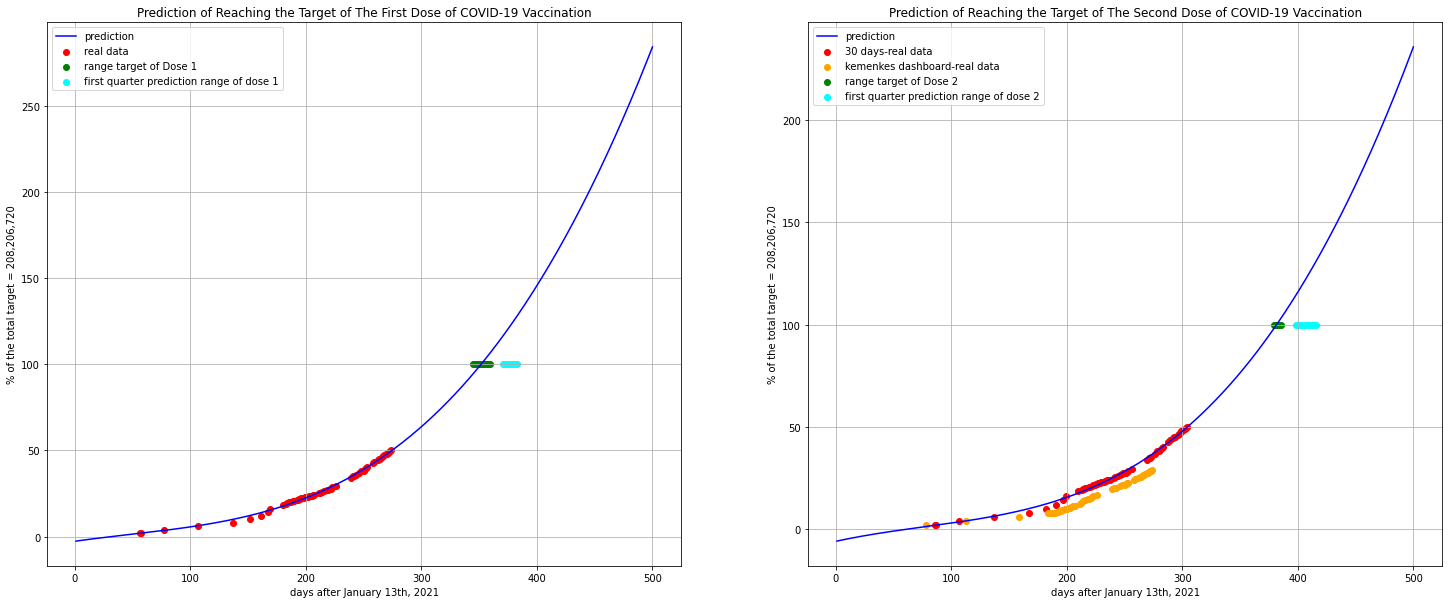

In [48]:
#CONCLUSION

#Plotting previous prediction range
  #DOSE 1
tgl1, val1 = [dt.date(2022, 1, 19), dt.date(2022, 1, 31)
      ],  [   2,    2.02]

    #Convert the date into the number of days counted from January 13th 2021.
from datetime import date
d0 = date(2021, 1, 13) #13 Januari 2021
dayday1 = []
for i in range(0,len(tgl1)):
  delta = tgl1[i] - d0
  dayday1.append(delta.days)

first_range_d1 = np.linspace(min(dayday1), max(dayday1), 10)

  #DOSE 2
tgl2 = [dt.date(2022, 2, 15), dt.date(2022, 3, 5)]

    #Convert the date into the number of days counted from January 13th 2021.
from datetime import date
d0 = date(2021, 1, 13) #13 Januari 2021
dayday2 = []
for i in range(0,len(tgl2)):
  delta = tgl2[i] - d0
  dayday2.append(delta.days)

first_range_d2 = np.linspace(min(dayday2), max(dayday2), 10)

print('Target of Dose 1 is within the interval from',f_lower, 'until',f_upper)
print('Target of Dose 2 is within the interval from',g_lower, 'until' ,g_upper)

hu = plt.figure(figsize=(25,10))

range1 = np.linspace(target_point1 - round(interval1) , target_point1 + round(interval1) , 2*round(interval1) + 1)
range2 = np.linspace(target_point2 - round(interval2) , target_point2 + round(interval2) , 2*round(interval2) + 1)

hu.add_subplot(1,2,1)
plt.scatter(X, y, c = 'red', label = 'real data')
plt.plot(k, reg_best1, c = 'blue', label = 'prediction')
plt.scatter(range1, [100]*len(range1), c = 'Green', label = 'range target of Dose 1')
plt.scatter(first_range, [100]*len(first_range_d1), c = 'cyan', label = 'first quarter prediction range of dose 1')
plt.title('Prediction of Reaching the Target of The First Dose of COVID-19 Vaccination')
plt.ylabel('% of the total target = 208,206,720')
plt.xlabel('days after January 13th, 2021')
plt.legend()
plt.grid()

hu.add_subplot(1,2,2)
plt.scatter(M, n, c = 'red', label = '30 days-real data')
plt.scatter(V, w, c = 'orange', label = 'kemenkes dashboard-real data')
plt.plot(k, reg_best2, c = 'blue', label = 'prediction')
plt.scatter(range2, [100]*len(range2), c = 'Green', label = 'range target of Dose 2')
plt.scatter(first_range_d2, [100]*len(first_range_d2), c = 'cyan', label = 'first quarter prediction range of dose 2')
plt.title('Prediction of Reaching the Target of The Second Dose of COVID-19 Vaccination')
plt.ylabel('% of the total target = 208,206,720')
plt.xlabel('days after January 13th, 2021')
plt.legend()
plt.grid()

Hopefully, in the end of the process, we will see the red scatter will reach the green scatter (as the prediction interval) in the graphs above. Thanks